In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite").connect()

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
sta = Base.classes.station
meas = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(meas.date).order_by(meas.date.desc()).first()

('2017-08-23',)

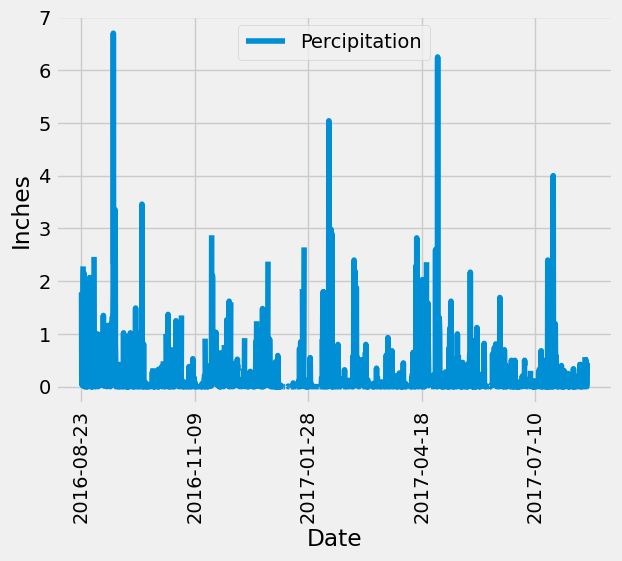

In [50]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
current_date = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
last_date = current_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
last_year = session.query(meas.date, meas.prcp).filter(meas.date >= last_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(last_year, columns=['Date', 'Percipitation'])

# Sort the dataframe by date
df.set_index('Date', inplace=True)
df = df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(ylabel='Inches')
plt.xticks(rotation=90)
plt.show()

In [26]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Percipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [40]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(sta.station)).all()

[(9,)]

In [43]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(meas.station, func.count(meas.station)).group_by(meas.station).order_by(func.count(meas.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [48]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(meas.tobs), func.max(meas.tobs), func.avg(meas.tobs)).filter(meas.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

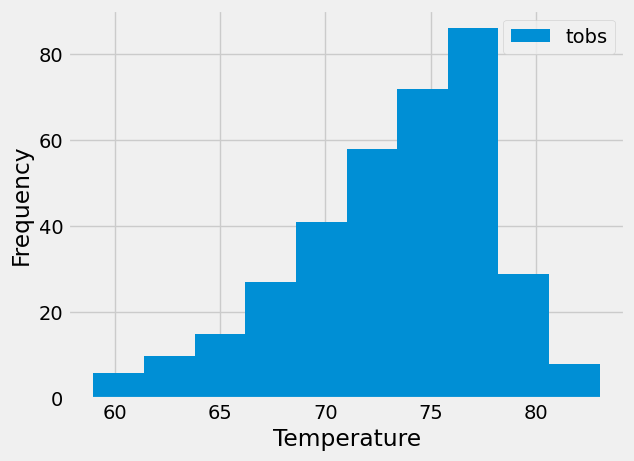

In [86]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year_act = session.query(meas.date, meas.tobs).filter(meas.date >= last_date).filter(meas.station == 'USC00519281').all()
tobs_df = pd.DataFrame(last_year_act, columns=['Temperature', 'Date'])

tobs_df.set_index('Temperature', inplace=True)
tobs_df = tobs_df.sort_index()

plt.hist(tobs_df)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(["tobs"], loc="upper right") 
plt.show()


# Close Session

In [87]:
# Close Session
session.close()